In [2]:
import sys
import os
import subprocess

app_base_dir = '/home/eusobg/EUSO-SPB/euso-spb-patt-reco-v1'
if app_base_dir not in sys.path:
    sys.path.append(app_base_dir)

import collections
import numpy as np
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
#import ROOT

In [3]:
import tool.npy_frames_visualization as npy_vis

In [4]:
signal_frames = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9.2017-08-02-21h39m46s/simu2npy/ev_13_mc_1__signals.npy")

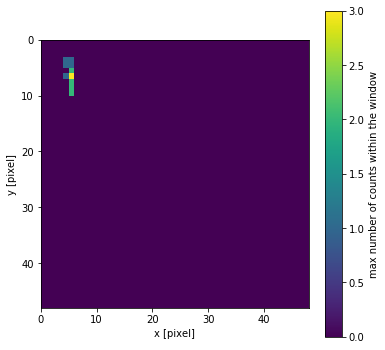

(<matplotlib.figure.Figure at 0x7fb1eb652048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1eb652978>)

In [5]:
npy_vis.visualize_frame(np.maximum.reduce(signal_frames[5:6]))

In [6]:
counts_frames = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9.2017-08-02-21h39m46s/simu2npy/ev_13_mc_1__counts.npy")

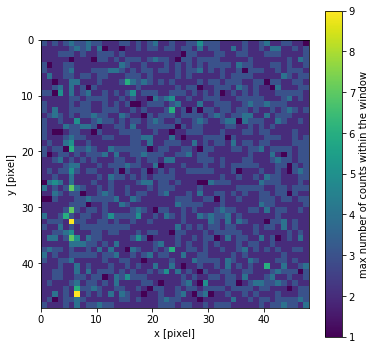

(<matplotlib.figure.Figure at 0x7fb1efd2a9b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1eb5740f0>)

In [7]:
npy_vis.visualize_frame(np.maximum.reduce(counts_frames))

In [8]:
simu_acq_frames = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9.2017-08-02-21h39m46s/npyconv/ev_13_mc_1__signals_p128_a0_g30_f128_b20170502-134817-001.001_k1_s0_d32_n1_m128.npy")

In [9]:
len(simu_acq_frames[:1])

1

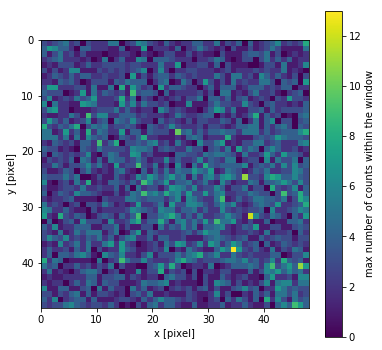

(<matplotlib.figure.Figure at 0x7fb1eb62b0b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1eb59ae80>)

In [10]:
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames[128+32:1+32+128]))

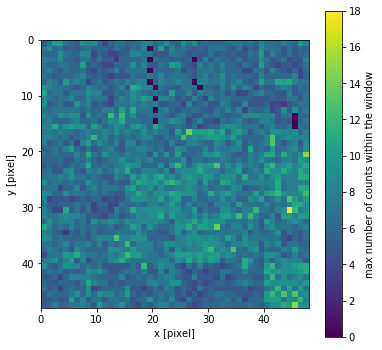

(<matplotlib.figure.Figure at 0x7fb1eb652860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ded917f0>)

In [11]:
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames[:128]))

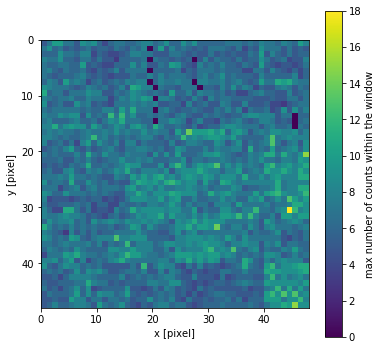

(<matplotlib.figure.Figure at 0x7fb1d3d91048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1d3d97c18>)

In [12]:
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames[128:]))

In [13]:
np.maximum.reduce(simu_acq_frames[128:])

array([[  5.,   7.,  10., ...,   6.,  10.,   8.],
       [  7.,   9.,   6., ...,   5.,   6.,   5.],
       [  6.,   6.,   6., ...,   5.,   6.,   6.],
       ..., 
       [  5.,   7.,   6., ...,  13.,   8.,   9.],
       [  5.,   5.,   6., ...,   9.,  12.,   8.],
       [  5.,   6.,   8., ...,  15.,   9.,   9.]])

In [14]:
np.maximum.reduce(simu_acq_frames[:128])

array([[  5.,   7.,  10., ...,   6.,  10.,   8.],
       [  7.,   9.,   6., ...,   5.,   6.,   5.],
       [  6.,   6.,   6., ...,   5.,   6.,   6.],
       ..., 
       [  5.,   7.,   6., ...,  13.,   8.,   9.],
       [  5.,   5.,   6., ...,   9.,  12.,   8.],
       [  5.,   6.,   8., ...,  15.,   9.,   9.]])

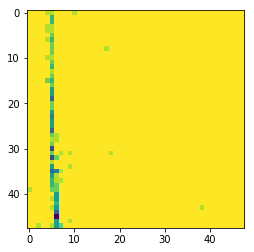

In [15]:
diff = np.add.reduce(simu_acq_frames[0:128]) - np.add.reduce(simu_acq_frames[128:])
plt.imshow(diff)
plt.show()

In [16]:
############

In [17]:
simu_acq_frames_ev14 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9.2017-08-02-21h39m46s/npyconv/ev_14_mc_1__signals_p128_a0_g30_f128_b20170502-134817-001.001_k1_s0_d32_n2_m128.npy")

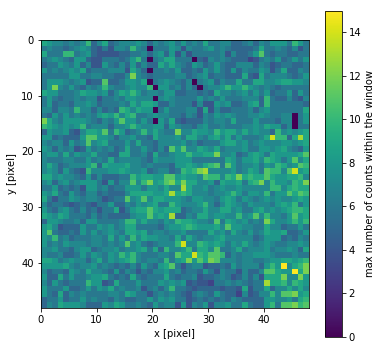

(<matplotlib.figure.Figure at 0x7fb202dde7f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1d064d128>)

In [18]:
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_ev14[128:]))

In [19]:
signal_frames_ev14 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9.2017-08-02-21h39m46s/simu2npy/ev_14_mc_1__signals.npy")

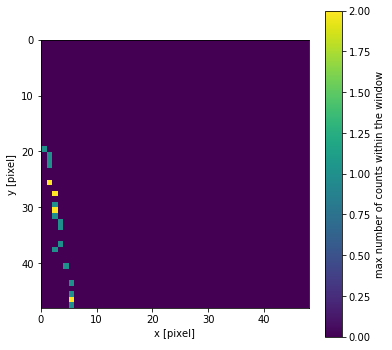

(<matplotlib.figure.Figure at 0x7fb2206491d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1d3da2860>)

In [20]:
npy_vis.visualize_frame(np.maximum.reduce(signal_frames_ev14[0:5]))

In [21]:
diff = np.maximum.reduce(simu_acq_frames_ev14[0:128]) - np.maximum.reduce(simu_acq_frames_ev14[128:])

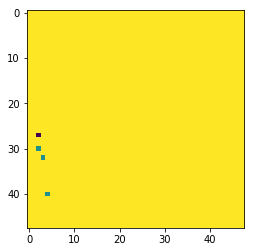

In [22]:
plt.imshow(diff)
plt.show()

In [23]:
###

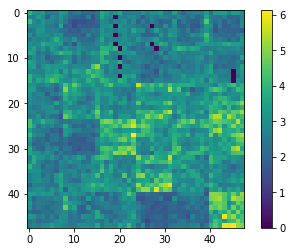

In [24]:

plt.imshow(   np.add.reduce(simu_acq_frames_ev14[0:128]) /128  )
plt.colorbar()
plt.show()

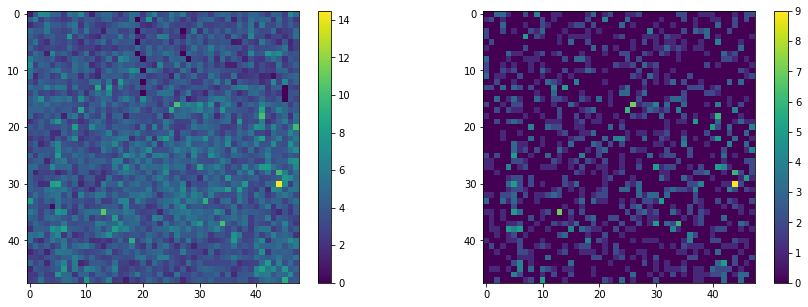

In [65]:
fig, axs = plt.subplots(1,2)
diff1 = np.maximum.reduce(simu_acq_frames[128+32:128+32+50]) -  ( np.add.reduce(simu_acq_frames_ev14[0:128]) / 128 )
diff2 = np.maximum.reduce(simu_acq_frames[128+32:128+32+50]) -  np.maximum.reduce(simu_acq_frames_ev14[0:128]) 

ims = axs[0].imshow((diff1 > 0)*diff1 )
fig.colorbar(ims, ax=axs[0])

ims = axs[1].imshow((diff2 > 0)*diff2 )
fig.colorbar(ims, ax=axs[1])

fig.set_size_inches(15,5)

plt.show()

In [26]:
import npy_l1_event_reader

Welcome to JupyROOT 6.10/00


In [27]:
npy_src_pathname = "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9.2017-08-02-21h39m46s/npyconv/ev_13_mc_1__signals_p128_a0_g30_f128_b20170502-134817-001.001_k1_s0_d32_n1_m128.npy"
trig_src_pathname = "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9.2017-08-02-21h39m46s/l1_tigger_kenji/trn_ev_13_mc_1__signals_p128_a0_g30_f128_b20170502-134817-001.001_k1_s0_d32_n1_m128_ec_asc_bgf_0.50.root"

with npy_l1_event_reader.NpyL1EventReader(npy_src_pathname, trig_src_pathname) as event_reader:
        for gtu_pdm_data in event_reader.iter_gtu_pdm_data():
            if len(gtu_pdm_data.l1trg_events) > 0:
                print(gtu_pdm_data.gtu)
                for l1trg_ev in gtu_pdm_data.l1trg_events:
                    print("  {} {}".format(l1trg_ev.pix_col, l1trg_ev.pix_row))

152
  33 17
184
  33 17
216
  33 17
248
  33 17


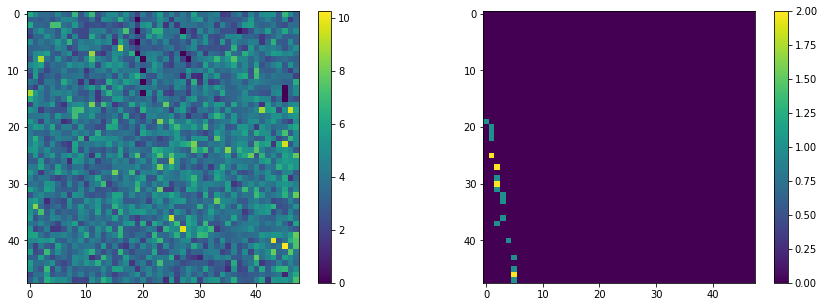

In [28]:
fig, axs = plt.subplots(1,2)
diff1 = np.maximum.reduce(simu_acq_frames_ev14[128:]) -  ( np.add.reduce(simu_acq_frames[0:128]) / 128 )
diff2 = np.add.reduce(simu_acq_frames_ev14[128+30:128+34]) -  np.add.reduce(simu_acq_frames_ev14[30:34]) 

ims = axs[0].imshow((diff1 > 0)*diff1 )
fig.colorbar(ims, ax=axs[0])

ims = axs[1].imshow((diff2 > 0)*diff2 )
fig.colorbar(ims, ax=axs[1])

fig.set_size_inches(15,5)

plt.show()

In [29]:
simu_acq_frames_ev23 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9.2017-08-02-21h39m46s/npyconv/ev_23_mc_1__signals_p128_a0_g30_f128_b20170502-134817-001.001_k1_s0_d32_n3_m128.npy")

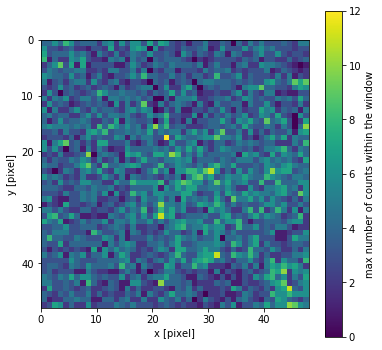

(<matplotlib.figure.Figure at 0x7fb19bee0198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1cf22fc50>)

In [30]:
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_ev23[128+32:128+32+2])) # -np.add.reduce(simu_acq_frames_ev23[:128]))

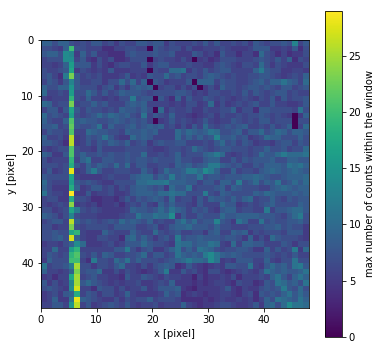

(<matplotlib.figure.Figure at 0x7fb1cf21ddd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ce9192e8>)

In [31]:
simu_acq_frames_bgf1_ev13 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+13/sep18.2017-07-06-15h26m14s/npyconv/ev_13_mc_1__signals_p128_a0_g30_f128_b20170502-134817-001.001_k1_s0_d32_n4_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf1_ev13[128:]))


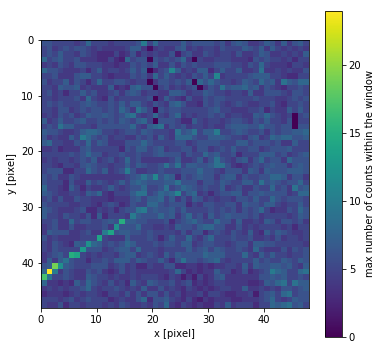

(<matplotlib.figure.Figure at 0x7fb1d06b5748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ce818c18>)

In [32]:
# 

simu_acq_frames_bgf1_ev65 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+13/sep18.2017-07-06-15h26m14s/npyconv/ev_65_mc_1__signals_p128_a0_g30_f128_b20170502-124722-001.001_k1_s0_d32_n17_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf1_ev65[128:]))


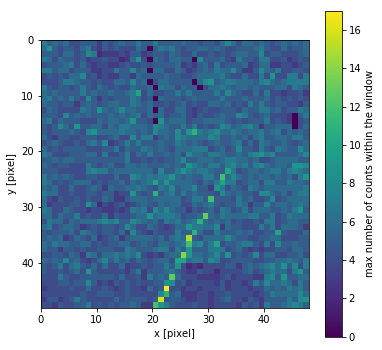

(<matplotlib.figure.Figure at 0x7fb1ce751780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ce862f60>)

In [33]:
# 

simu_acq_frames_bgf1_ev86 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+13/thousnd18E20.2017-07-28-21h36m17s/npyconv/ev_86_mc_1__signals_p128_a0_g30_f128_b20170502-124722-001.001_k1_s0_d32_n30_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf1_ev86[128:]))

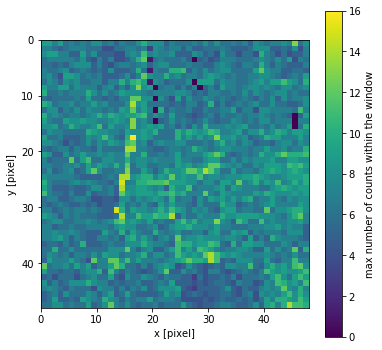

(<matplotlib.figure.Figure at 0x7fb19bf1c470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ce6b4f28>)

In [34]:
simu_acq_frames_bgf075_ev7 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+13/sep18.2017-07-06-16h18m59s/npyconv/ev_7_mc_1__signals_p128_a0_g30_f128_b20170502-134817-001.001_k1_s0_d32_n4_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf075_ev7[128:]))

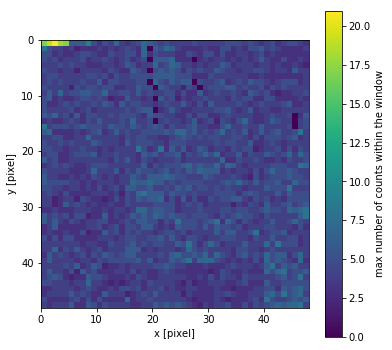

(<matplotlib.figure.Figure at 0x7fb19bf34860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ce65d8d0>)

In [35]:
simu_acq_frames_bgf075_ev80 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_21000000.00/energy_1.00e+13/sep21.2017-07-07-12h49m18s/npyconv/ev_80_mc_1__signals_p128_a0_g30_f128_b20170501-093011-001.001_k1_s0_d32_n3_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf075_ev80[128:]))

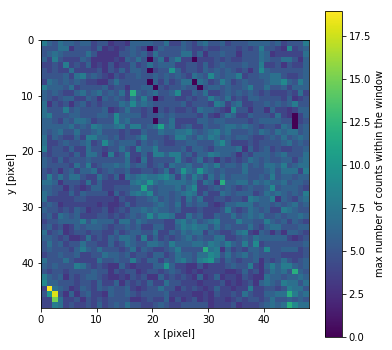

(<matplotlib.figure.Figure at 0x7fb19bdad1d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ce7ebd68>)

In [36]:
simu_acq_frames_bgf05_ev29 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+13/sep18.2017-07-06-17h24m09s/npyconv/ev_29_mc_1__signals_p128_a0_g30_f128_b20170502-124722-001.001_k1_s0_d32_n8_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf05_ev29[128:]))

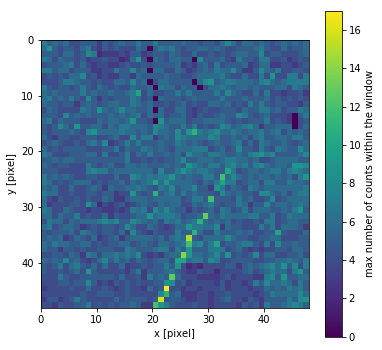

(<matplotlib.figure.Figure at 0x7fb19bdef978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ce58e748>)

In [37]:
simu_acq_frames_bgf05_ev86 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+13/thousnd18E20.2017-07-28-21h36m17s/npyconv/ev_86_mc_1__signals_p128_a0_g30_f128_b20170502-124722-001.001_k1_s0_d32_n30_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf05_ev86[128:]))

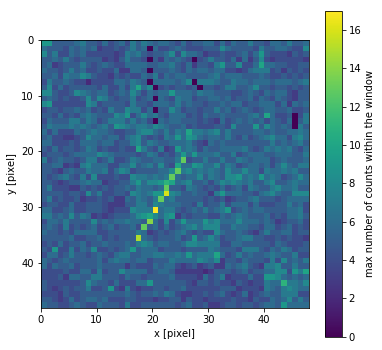

(<matplotlib.figure.Figure at 0x7fb1ce5acfd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1a82dd2b0>)

In [38]:
simu_acq_frames_bgf05_ev98 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+12/thousnd18_lE_E9/npyconv/ev_98_mc_1__signals_p128_a0_g30_f128_b20170502-124722-001.001_k1_s0_d32_n11_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf05_ev98[128:]))

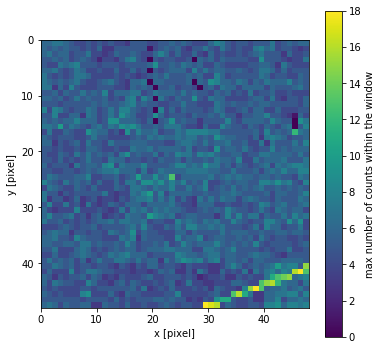

(<matplotlib.figure.Figure at 0x7fb1cebadbe0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1cebb0358>)

In [46]:
simu_acq_frames_bgf05_ev31 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_18000000.00/energy_1.00e+13/sep18.2017-07-06-15h42m47s/npyconv/ev_31_mc_1__signals_p128_a0_g30_f128_b20170502-124722-001.001_k1_s0_d32_n3_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf05_ev31[128:]))

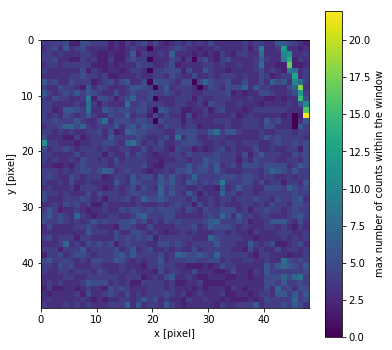

(<matplotlib.figure.Figure at 0x7fb1ce53f2e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1a8296eb8>)

In [39]:
# wierd case bgf=1 has 13 triggered, bgf=0.5 has 1
simu_acq_frames_bgf05_1_ev15 = np.load("/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_5.95e+12/simu.2017-07-21-10h27m34s/npyconv/ev_15_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n11_m128.npy")
npy_vis.visualize_frame(np.maximum.reduce(simu_acq_frames_bgf05_1_ev15[128:]))

bgfactor 0.5
150
  38 2
159
  9 10
  9 11
167
  45 9
  45 10
  46 10
  45 11
  46 11
  46 14
168
  45 9
  46 9
  45 10
  46 10
169
  43 3
  44 3
  45 3
  43 4
  44 4
  45 4
  43 5
  44 5
  45 5
170
  42 1
  43 1
  44 1
182
  38 2
191
  9 10
  9 11
214
  38 2
223
  9 10
  9 11
246
  38 2
bgfactor 1
167
  46 11
168
  45 9
  46 9
169
  43 3
  44 3
  45 3
  43 4
  44 4
  45 4
  44 5
  45 5
170
  43 1
  44 1


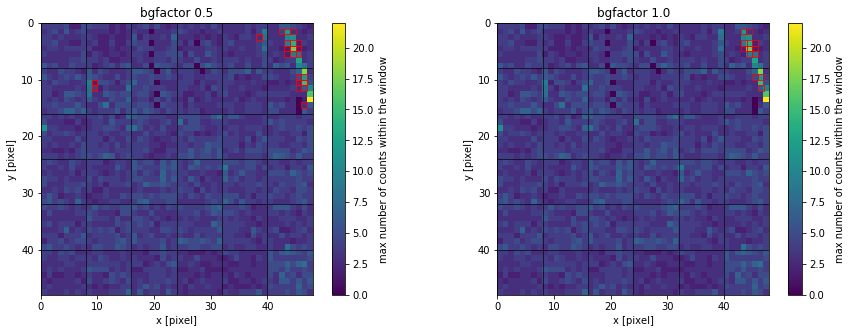

In [45]:
ev15_npy_pathname="/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_5.95e+12/simu.2017-07-21-10h27m34s/npyconv/ev_15_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n11_m128.npy"
ev15_tbgf05_pathname="/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_5.95e+12/simu.2017-07-21-10h27m34s/l1_tigger_kenji/trn_ev_15_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n11_m128_ec_asc_bgf_0.50.root"
ev15_tbgf10_pathname="/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_5.95e+12/simu.2017-07-21-10h27m34s/l1_tigger_kenji/trn_ev_15_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n11_m128_ec_asc_bgf_1.00.root"

ev15_integrated = np.maximum.reduce(simu_acq_frames_bgf05_1_ev15[128:])

fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,5)

print("bgfactor 0.5")
with npy_l1_event_reader.NpyL1EventReader(ev15_npy_pathname, ev15_tbgf05_pathname) as event_reader:
    l1trg_events = []
    for gtu_pdm_data in event_reader.iter_gtu_pdm_data():
        if len(gtu_pdm_data.l1trg_events) > 0:
            print(gtu_pdm_data.gtu)
            for l1trg_ev in gtu_pdm_data.l1trg_events:
                print("  {} {}".format(l1trg_ev.pix_col, l1trg_ev.pix_row))
            l1trg_events += gtu_pdm_data.l1trg_events
    npy_vis.visualize_frame(ev15_integrated, event_reader.exp_tree, l1trg_events, title="bgfactor 0.5", ax=axs[0], show=False)
        

print("bgfactor 1")
with npy_l1_event_reader.NpyL1EventReader(ev15_npy_pathname, ev15_tbgf10_pathname) as event_reader:
    l1trg_events = []
    for gtu_pdm_data in event_reader.iter_gtu_pdm_data():
        if len(gtu_pdm_data.l1trg_events) > 0:
            print(gtu_pdm_data.gtu)
            for l1trg_ev in gtu_pdm_data.l1trg_events:
                print("  {} {}".format(l1trg_ev.pix_col, l1trg_ev.pix_row))
            l1trg_events += gtu_pdm_data.l1trg_events
    npy_vis.visualize_frame(ev15_integrated, event_reader.exp_tree, l1trg_events, title="bgfactor 1.0", ax=axs[1], show=False)

    
plt.show()


bgfactor 0.5
155
  25 26
172
  46 37
  46 38
173
  46 37
  46 38
174
  46 38
175
  46 38
  45 41
  46 41
176
  45 41
  46 41
177
  45 41
  46 41
187
  25 26
219
  25 26
251
  25 26
bgfactor 0.75
172
  46 38
173
  46 38
174
  46 38
176
  45 41
  46 41
177
  45 41
  46 41
bgfactor 1.0
173
  46 38
174
  46 38
176
  45 41
  46 41


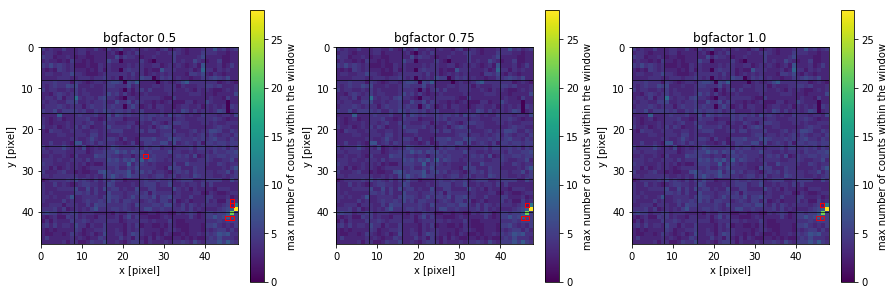

In [55]:

def vis_triggers(ev_npy_pathname, tbgf05_pathname=None, tbgf075_pathname=None, tbgf10_pathname=None):

#     ev_npy_frames = np.load(ev_npy_pathname)
#     ev_integrated = np.maximum.reduce(ev_npy_frames[128:])

    fig, axs = plt.subplots(1,bool(tbgf05_pathname)+bool(tbgf075_pathname)+bool(tbgf10_pathname))
    fig.set_size_inches(15,5)

    bgfactors = [("bgfactor 0.5", tbgf05_pathname), ("bgfactor 0.75", tbgf075_pathname), ("bgfactor 1.0", tbgf10_pathname)]
    
    i=0
    for title, trigger_pathname in bgfactors:
        if trigger_pathname:
            print(title)
            with npy_l1_event_reader.NpyL1EventReader(ev_npy_pathname, trigger_pathname) as event_reader:
#                 ev_integrated = np.maximum.reduce(ev_npy_frames[128:]) 
                ev_integrated = np.maximum.reduce(event_reader._current_acquisition_ndarray[128:]) 
                l1trg_events = []
                for gtu_pdm_data in event_reader.iter_gtu_pdm_data():
                    if len(gtu_pdm_data.l1trg_events) > 0:
                        print(gtu_pdm_data.gtu)
                        for l1trg_ev in gtu_pdm_data.l1trg_events:
                            print("  {} {}".format(l1trg_ev.pix_col, l1trg_ev.pix_row))
                        l1trg_events += gtu_pdm_data.l1trg_events
                npy_vis.visualize_frame(ev_integrated, event_reader.exp_tree, l1trg_events, title=title, ax=axs[i], show=False)
                i += 1


    plt.show()
    
vis_triggers(
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-22-19h51m20s/npyconv/ev_66_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n27_m128.npy",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-22-19h51m20s/l1_tigger_kenji/trn_ev_66_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n27_m128_ec_asc_bgf_0.50.root",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-22-19h51m20s/l1_tigger_kenji/trn_ev_66_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n27_m128_ec_asc_bgf_0.75.root",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-22-19h51m20s/l1_tigger_kenji/trn_ev_66_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n27_m128_ec_asc_bgf_1.00.root"
);

bgfactor 0.5
166
  41 35
  41 36
167
  36 34
  37 34
  38 34
  36 35
  37 35
  38 35
  36 36
  37 36
  38 36
168
  33 34
bgfactor 0.75
bgfactor 1.0


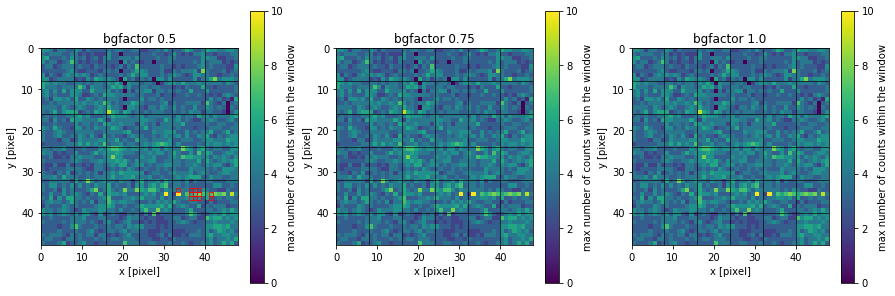

In [62]:
vis_triggers(
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-23-00h14m11s/npyconv/ev_82_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n42_m128.npy",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-23-00h14m11s/l1_tigger_kenji/trn_ev_82_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n42_m128_ec_asc_bgf_0.50.root",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-23-00h14m11s/l1_tigger_kenji/trn_ev_82_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n42_m128_ec_asc_bgf_0.75.root",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-23-00h14m11s/l1_tigger_kenji/trn_ev_82_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n42_m128_ec_asc_bgf_1.00.root"
)

bgfactor 0.5
147
  38 5
165
  17 17
  18 17
167
  22 14
168
  25 12
169
  27 11
  25 12
  26 12
  27 12
  25 13
  26 13
170
  28 10
  29 10
  28 11
  29 11
  28 12
  29 12
171
  33 9
  33 10
  30 9
  29 10
  30 10
  30 11
  29 12
172
  33 9
  33 10
173
  33 9
  34 9
  35 9
174
  36 6
  37 6
  35 9
175
  38 5
  37 6
  38 6
176
  41 6
177
  41 4
  42 4
  41 5
  42 5
  41 6
178
  43 3
  42 4
  43 4
  42 5
179
  38 5
  44 2
  45 2
  43 3
  44 3
  45 3
  43 4
  44 4
  45 4
180
  45 2
  45 3
211
  38 5
243
  38 5
bgfactor 0.75
170
  28 10
  29 10
  28 11
  29 11
  28 12
  29 12
171
  30 9
  30 10
  30 11
172
  33 9
  33 10
173
  33 9
  34 9
  35 9
174
  35 9
175
  37 6
  38 6
177
  41 4
  41 5
  41 6
179
  44 3
bgfactor 1.0
170
  29 10
  29 11
171
  30 10
  30 11
172
  33 9
  33 10
173
  33 9
  34 9


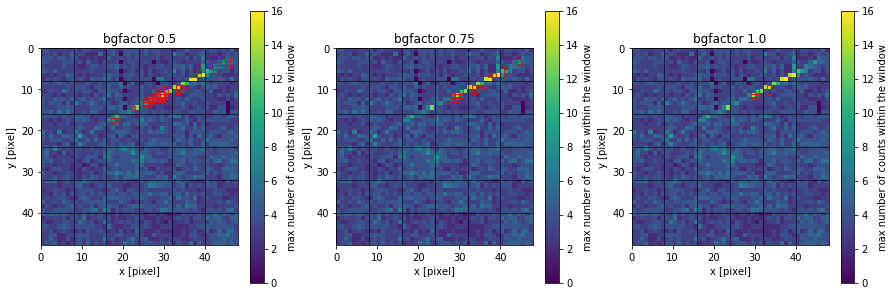

In [64]:
vis_triggers(
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.01e+12/thousnd30E14.2017-07-25-09h58m06s/npyconv/ev_80_mc_1__signals_p128_a0_g30_f128_b20170429-070031-019.001_k1_s0_d32_n32_m128.npy",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.01e+12/thousnd30E14.2017-07-25-09h58m06s/l1_tigger_kenji/trn_ev_80_mc_1__signals_p128_a0_g30_f128_b20170429-070031-019.001_k1_s0_d32_n32_m128_ec_asc_bgf_0.50.root",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.01e+12/thousnd30E14.2017-07-25-09h58m06s/l1_tigger_kenji/trn_ev_80_mc_1__signals_p128_a0_g30_f128_b20170429-070031-019.001_k1_s0_d32_n32_m128_ec_asc_bgf_0.75.root",
    "/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.01e+12/thousnd30E14.2017-07-25-09h58m06s/l1_tigger_kenji/trn_ev_80_mc_1__signals_p128_a0_g30_f128_b20170429-070031-019.001_k1_s0_d32_n32_m128_ec_asc_bgf_1.00.root"
)

#/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_30000000.00/energy_5.01e+12/thousnd30E14.2017-07-25-09h58m06s/l1_tigger_kenji/trn_ev_80_mc_1__signals_p128_a0_g30_f128_b20170429-070031-019.001_k1_s0_d32_n32_m128_ec_asc_bgf_1.00.root

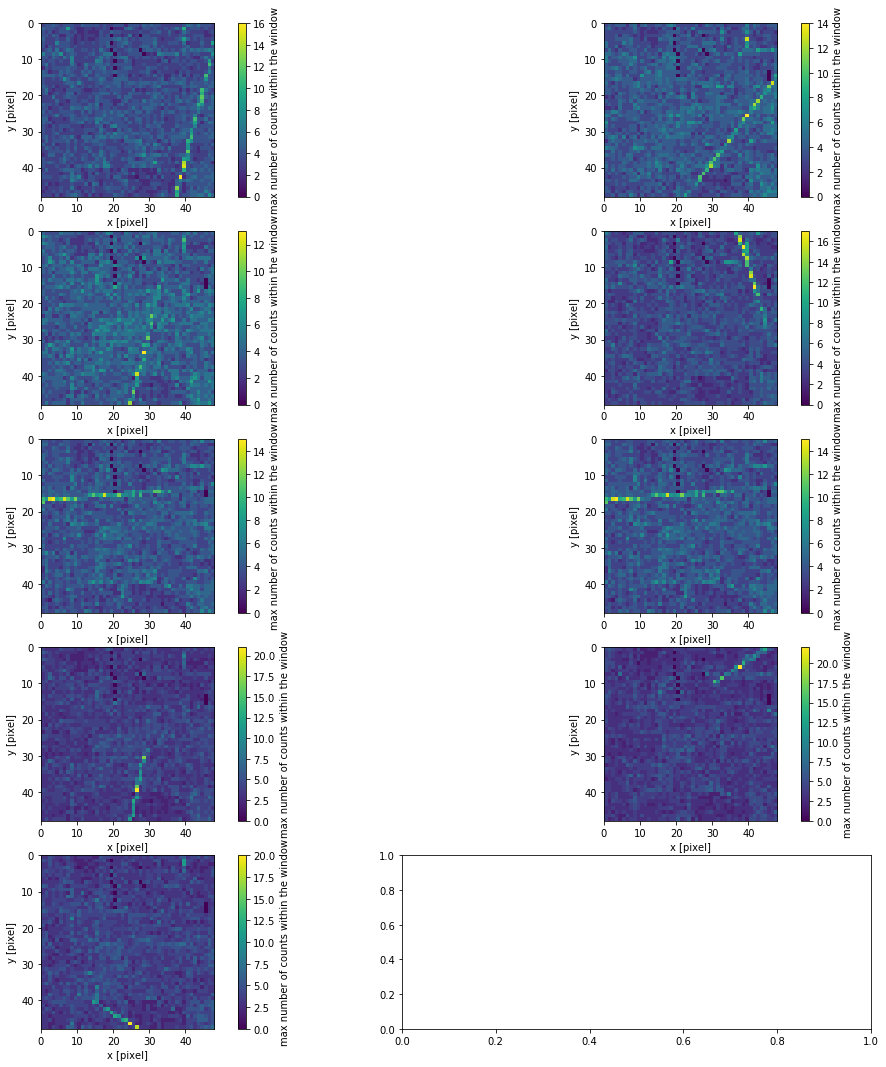

In [74]:
events = [
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h36m47s/npyconv/ev_8_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n3_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-11h31m06s/npyconv/ev_67_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n23_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h36m47s/npyconv/ev_36_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n15_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h55m34s/npyconv/ev_25_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n5_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-11h04m47s/npyconv/ev_60_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n12_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-11h04m47s/npyconv/ev_60_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n12_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h55m34s/npyconv/ev_54_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n15_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-11h12m54s/npyconv/ev_89_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n39_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h26m33s/npyconv/ev_66_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n22_m128.npy",
]

fig, axs = plt.subplots(5,2)
axs_flattned = axs.flatten()
fig.set_size_inches(18.5, 18.5)

for i, npy_ev in enumerate(events):
    frames = np.load(npy_ev)
    ev_integrated = np.maximum.reduce(frames[128:]) 
    npy_vis.visualize_frame(ev_integrated, ax=axs_flattned[i], show=False)
    
plt.show()

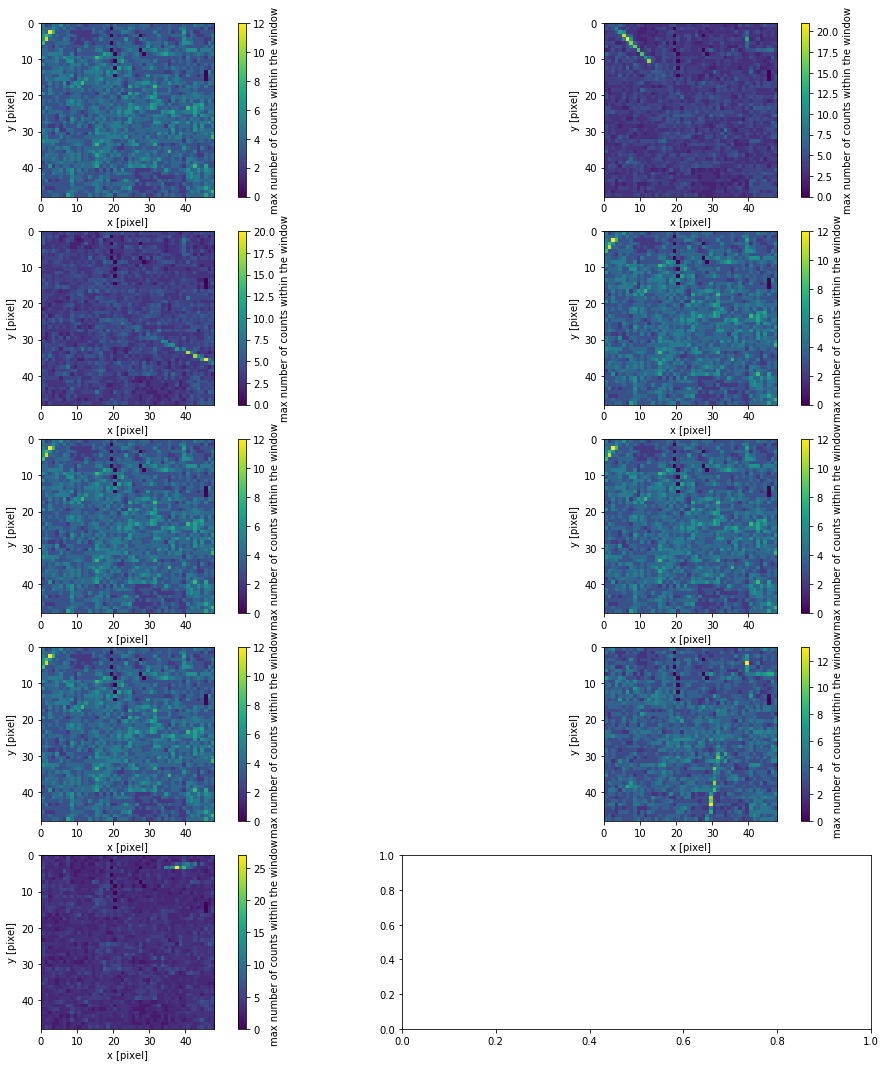

In [77]:


events = [
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h26m33s/npyconv/ev_52_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n17_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-11h31m06s/npyconv/ev_9_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n6_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-11h12m54s/npyconv/ev_77_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n34_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h26m33s/npyconv/ev_52_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n17_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h26m33s/npyconv/ev_52_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n17_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h26m33s/npyconv/ev_52_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n17_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h26m33s/npyconv/ev_52_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n17_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-10h36m47s/npyconv/ev_14_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n6_m128.npy",
"/home/eusobg/EUSO-SPB/SPBDATA_processed/spb_simu/posz_24000000.00/energy_3.25e+12/simu.2017-07-16-11h12m54s/npyconv/ev_62_mc_1__signals_p128_a0_g30_f128_b20170427-105115-001.001_k1_s0_d32_n28_m128.npy",

]

fig, axs = plt.subplots(5,2)
axs_flattned = axs.flatten()
fig.set_size_inches(18.5, 18.5)

for i, npy_ev in enumerate(events):
    frames = np.load(npy_ev)
    ev_integrated = np.maximum.reduce(frames[128:]) 
    npy_vis.visualize_frame(ev_integrated, ax=axs_flattned[i], show=False)
    
plt.show()

In [41]:
#df = psql.read_sql("SELECT * FROM spb_processing_event_ver2 WHERE source_file_acquisition LIKE 'ev_%' AND source_file_trigger LIKE '%bgf_0.50.root' AND num_triggered_pixels > 10 ORDER BY source_file_acquisition_full LIMIT 30;",con)
